In [36]:
import torch
import torchvision.transforms as transforms
from torchvision.transforms import (Compose,Normalize)
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torchattacks

device="cpu"

In [37]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [38]:
def load_image(img_path, transform):
    image = Image.open(img_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

In [39]:
model = models.resnet18(pretrained=True).to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
img_path = '../images/Example_image_6.jpg'  # Replace with your image path
image = load_image(img_path, transform)
image = image.to(device)

In [41]:
image.shape

torch.Size([1, 3, 355, 500])

In [42]:
originl_pred=model(image)
original_pred=originl_pred.argmax()
original_pred

tensor(87)

In [43]:
label = torch.tensor([original_pred]).to(device)  # Replace with the correct label for your image

In [48]:
attack=torchattacks.BIM(model,eps=2/255,alpha=2/255,steps=10)
adv_image=attack(image,label)

In [49]:
new_pred=model(adv_image)
new_pred=new_pred.argmax()
new_pred

tensor(591)

In [50]:
original_image = image.squeeze(0).cpu().detach().numpy().transpose((1, 2, 0))  # Convert to NumPy array and reshape
adversarial_image = adv_image.squeeze(0).cpu().detach().numpy().transpose((1, 2, 0))

differnce=np.abs(original_image-adversarial_image).mean(axis=-1)
difference=differnce/differnce.max()

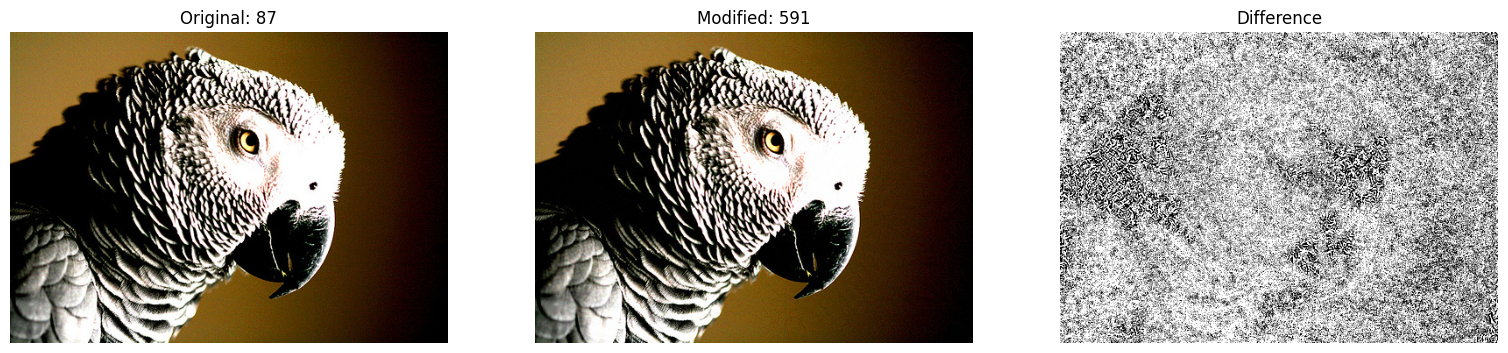

In [51]:

_, (ax_orig, ax_new, ax_diff) = plt.subplots(1, 3, figsize=(19.20,10.80))

ax_orig.imshow(original_image)
ax_new.imshow(adversarial_image)
ax_diff.imshow(difference, cmap="gray")

ax_orig.axis("off")
ax_new.axis("off")
ax_diff.axis("off")

ax_orig.set_title(f"Original: {original_pred}")
ax_new.set_title(f"Modified: {new_pred}")
ax_diff.set_title("Difference")

plt.savefig("AttackedImages/BasicIterativeMethod.png")